# Sheet properties

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import matplotlib.pyplot as plt

# Start with local

In [4]:
import sys
from IPython.display import HTML
sys.path.append('/home/rcendre/classification')

# Imports

In [5]:
import os
import sys
import itertools
import webbrowser
from pathlib import Path
import matplotlib.pyplot as plt
from numpy import array, logspace
from scipy.stats import randint as randint
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import davies_bouldin_score
from toolbox.classification.common import Folds, IO, Tools
from toolbox.classification.parameters import Dermatology, Settings
from toolbox.models.builtin import Applications
from toolbox.IO import dermatology
from toolbox.transforms.common import PredictorTransform
from toolbox.transforms.labels import OrderedEncoder
from toolbox.transforms.images import DistributionImageTransform, FirstOrderImageTransform, HaralickImageTransform, SpatialImageTransform
from toolbox.views.common import Views, ViewsTools
from toolbox.views.images import ImagesViews
from IPython.display import display

Using TensorFlow backend.


# Parameters

In [6]:
# Advanced parameters
data_type='Full'
validation = 4
statistics = Dermatology.get_statistics_keys()
settings = Settings.get_default_dermatology()

# Inputs

In [7]:
inputs = Dermatology.images(modality='Microscopy', data_type=data_type)

# Features extraction

In [8]:
features_file = f'Spatial_{data_type}.pickle'

## Descriptors

In [9]:
extractors = []
# Spatial based
# First order
extractors.append(('FirstOrder', FirstOrderImageTransform()))
## Haralick
extractors.append(('Haralick', HaralickImageTransform(return_mean=False, compute_14th_feature=True)))
extractors.append(('HaralickMean', HaralickImageTransform(return_mean=True, compute_14th_feature=True)))
## Spatial
extractors.append(('Wiltgen', SpatialImageTransform()))
extractors.append(('WiltgenAll', SpatialImageTransform(wiltgen=False)))

## Features extraction

In [10]:
# for extractor in extractors: 
#     # Decompose model
#     extractor_name, extractor_process = extractor
    
#     # Start extracting
#     print(f'{extractor_name} performed...', end='\r')
#     Tools.transform(inputs, {'datum': 'Datum'}, extractor_process, extractor_name)
#     print(f'{extractor_name} achieved !', end='\r')
    
#     # Save
#     IO.save(inputs, features_file)

In [11]:
inputs = IO.load(features_file)

# Label / Group / Fold

In [12]:
# # Transform groups
# group_encoder = LabelEncoder().fit(array(inputs['ID_Patient'].tolist()))
# Tools.transform(inputs, {'datum': 'ID_Patient'}, group_encoder, 'GroupEncode')
# # Transform labels
# label_encoder = OrderedEncoder().fit(['Normal', 'Benign', 'Malignant'])
# Tools.transform(inputs, {'datum': 'Label'}, label_encoder, 'LabelEncode')
# # Transform labels
# malignant_encoder = OrderedEncoder().fit(['Normal', 'Pathological'])
# Tools.transform(inputs, {'datum': 'Pathological'}, malignant_encoder, 'PathologicalEncode')
# malignant_encoder = OrderedEncoder().fit(['Rest', 'Malignant'])
# Tools.transform(inputs, {'datum': 'Malignant'}, malignant_encoder, 'MalignantEncode')
# # Make folds
# Folds.build_group_folds(inputs, {'datum': 'Datum', 'label_encode': 'LabelEncode', 'group': 'GroupEncode'}, validation)
# IO.save(inputs, features_file)

## Features

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

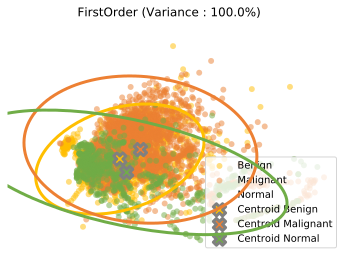

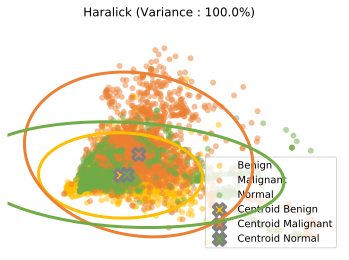

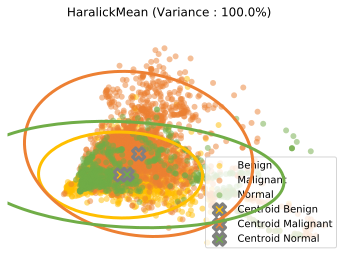

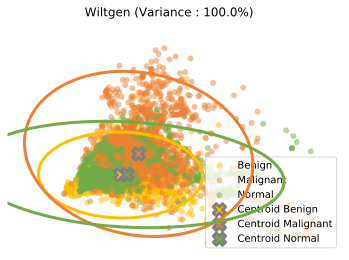

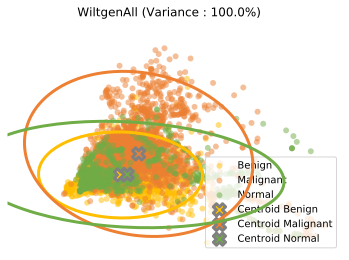

In [13]:
inputs = IO.load(features_file)
for extractor in extractors: 
    extractor_name, extractor_process = extractor
    # PCA + TSNE
    figure = Views.projection(inputs, {'datum': extractor_name, 'label': 'Label'}, settings);
    figure.savefig(f"{extractor_name}.png", bbox_inches='tight', dpi=300)
    
#     Views.projection(inputs, {'datum': extractor_name, 'label': 'Pathological'}, settings);
#     Views.projection(inputs, {'datum': extractor_name, 'label': 'Pathological'}, settings, mode='TSNE');
    
#     Views.projection(inputs, {'datum': extractor_name, 'label': 'Malignant'}, settings);
#     Views.projection(inputs, {'datum': extractor_name, 'label': 'Malignant'}, settings, mode='TSNE');